In [ ]:
!conda install tensorflow

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tensorboard-1.12.0         |   py36hdc36e2c_0         6.0 MB
    _tflow_select-2.3.0        |              mkl           3 KB
    keras-applications-1.0.6   |           py36_0          49 KB
    tensorflow-base-1.12.0     |mkl_py36h70e0e9a_0        85.6 MB
    keras-preprocessing-1.0.5  |           py36_0          52 KB
    keras-2.2.4                |                0           5 KB
    keras-base-2.2.4           |           py36_0         457 KB
    tensorflow-1.12.0          |mkl_py36h2b2bbaf_0           4 KB
    ------------------------------------------------------------
                                           Total:        92.1 MB

The following NEW packages will be INSTALLED:

    _tflow_select:       2.3

In [ ]:
import keras
!conda install keras

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras import metrics
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print('Training images shape: ' + str(train_images.shape))
print('Training targets shape: ' + str(train_targets.shape))
print('Targets: ' + str(train_targets))

Training images shape: (60000, 28, 28)
Training targets shape: (60000,)
Targets: [5 0 4 ... 5 6 8]


In [3]:
# Plot the first 10 digits
def digits_plotter(n_digits):

    # Temporary hide Seaborn grid lines
    with sns.axes_style('white'):
        plt.figure(figsize=(12, 6))
        for i in range(n_digits):
            digit = test_images[i]
            fig = plt.subplot(2, 5, i + 1)
            plt.imshow(digit, cmap=plt.cm.binary)

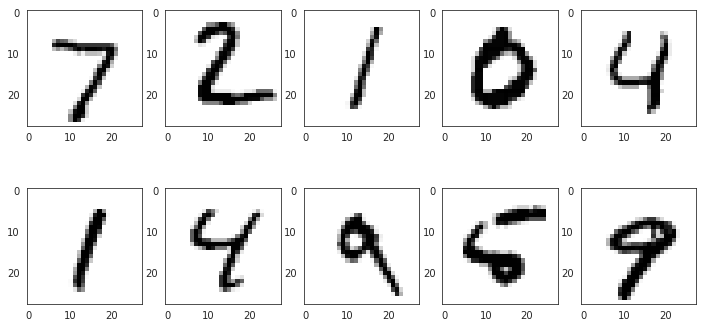

In [4]:
digits_plotter(10)

In [5]:
# Reshape images data into a (number of samples, 28x28) matrix
x_train = train_images.reshape((60000, 28 * 28))
x_test = test_images.reshape((10000, 28 * 28))

# Change pixel values from (0, 255) to (0, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding of expected results
y_train = to_categorical(train_targets).astype('int')
y_test = to_categorical(test_targets).astype('int')

print('Encoded targets shape: ' + str(y_train.shape))

# Show a sample of encoded input
df = pd.DataFrame(y_train)
df.sample(n=10)

Encoded targets shape: (60000, 10)


,0,1,2,3,4,5,6,7,8,9
28529,0,0,0,0,0,0,0,1,0,0
34210,0,0,0,0,1,0,0,0,0,0
31941,0,0,0,0,1,0,0,0,0,0
15984,0,0,0,0,0,1,0,0,0,0
39526,0,0,0,0,0,1,0,0,0,0
21106,0,0,0,0,0,0,0,0,1,0
29893,0,0,1,0,0,0,0,0,0,0
30533,0,0,1,0,0,0,0,0,0,0
38412,1,0,0,0,0,0,0,0,0,0
48570,0,0,0,0,0,0,1,0,0,0


In [6]:
# Create a (784, 512, 256, 10) model
model = Sequential()
# This is the first layer?
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax')) 
# If the last line above doesn't work, try the following
#model.add(Dense(10))
#model.add(Activation(tf.nn.softmax))

# Describe the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = categorical_crossentropy, 
              optimizer = 'adam',
              metrics = [metrics.categorical_accuracy])

# If the compilation doesn't work, try 
# import keras.backend as K
# def get_categorical_accuracy_keras(y_true, y_pred):
#    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))

# model.compile(loss=categorical_crossentropy, 
#               optimizer='adam', 
#               metrics=[get_categorical_accuracy_keras])

In [8]:
history = model.fit(x_train,
                    y_train,
                    validation_split = 0.1,
                    epochs = 20, 
                    batch_size = 512)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 52us/step - loss: 0.4029 - categorical_accuracy: 0.8877 - val_loss: 0.1369 - val_categorical_accuracy: 0.9612
Epoch 2/20
54000/54000 [==============================] - 2s 45us/step - loss: 0.1427 - categorical_accuracy: 0.9583 - val_loss: 0.0996 - val_categorical_accuracy: 0.9715
Epoch 3/20
54000/54000 [==============================] - 3s 46us/step - loss: 0.0923 - categorical_accuracy: 0.9724 - val_loss: 0.0805 - val_categorical_accuracy: 0.9767
Epoch 4/20
54000/54000 [==============================] - 3s 51us/step - loss: 0.0660 - categorical_accuracy: 0.9804 - val_loss: 0.0759 - val_categorical_accuracy: 0.9782
Epoch 5/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0494 - categorical_accuracy: 0.9851 - val_loss: 0.0751 - val_categorical_accuracy: 0.9793
Epoch 6/20
54000/54000 [==============================] - 2s 44us/step - loss: 0.0373 - categori

In [9]:
history.history

{'val_loss': [0.13694543886184693,
  0.09958662883440654,
  0.08045677069822947,
  0.07592158043384552,
  0.0750832523504893,
  0.07056190466880799,
  0.0708245416879654,
  0.06699621971448262,
  0.06573503704865774,
  0.07822337138652802,
  0.0839231854279836,
  0.0736524084409078,
  0.07080244692166646,
  0.07714957722028097,
  0.08672993151346843,
  0.07759407353401183,
  0.07705016136169433,
  0.0802519892056783,
  0.08799857521057129,
  0.09189336554209392],
 'val_categorical_accuracy': [0.9611666673024496,
  0.9714999996821085,
  0.9766666653951009,
  0.9781666671435039,
  0.9793333320617675,
  0.9813333338101705,
  0.9806666673024496,
  0.9825000004768372,
  0.9818333347638448,
  0.9794999996821085,
  0.9791666671435039,
  0.9823333328564962,
  0.9835000004768372,
  0.9821666671435039,
  0.9803333338101705,
  0.9808333320617676,
  0.9841666661898295,
  0.9821666663487753,
  0.9801666661898295,
  0.9793333319028219],
 'loss': [0.402914542304145,
  0.14271147625534622,
  0.0923416

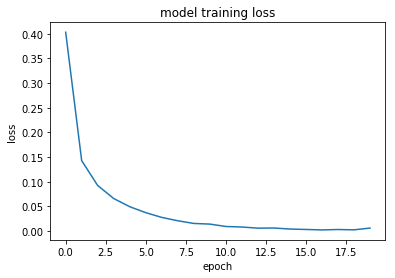

In [10]:
# Plot Loss
plt.plot(history.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

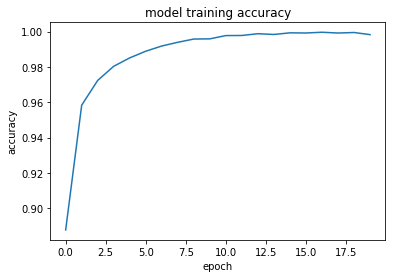

In [11]:
# Plot Loss
plt.plot(history.history['categorical_accuracy'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [12]:
y_pred = model.predict(x_test)

In [13]:
predictions = np.argmax(y_pred, axis=1)
y_pred = to_categorical(predictions)

In [14]:
print('Accuracy = %.3f' % accuracy_score(y_pred, y_test))

Accuracy = 0.982


In [15]:
!pip install scipy
!pip install yellowbrick

    100% |████████████████████████████████| 286kB 7.3MB/s ta 0:00:011
    100% |████████████████████████████████| 13.8MB 2.3MB/s eta 0:00:01
  Found existing installation: matplotlib 3.0.2
    Uninstalling matplotlib-3.0.2:
      Successfully uninstalled matplotlib-3.0.2


In [ ]:
!pip install 